<a href="https://colab.research.google.com/github/Gupta-Vaishali/Song-Genre-Classification/blob/main/Prepocessing_and_Analysing_the_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


```
Dataset name : english_cleaned_lyrics.csv
The attributes are : 
Unnamed 0 : This attribute is of no value to us.
Index : This attribute contains the index no. for each record.
Song : This attribute contains the name of the song.
Year : This attribute contains the year the song was released.
Artist : This attribute contains the name of the artist of the song.
Lyrics : This attribute contains the lyrics of the song.
Genre : This attribute specifies the genre of the song. This is the target variable.

Aim of project : Song Genre Classification and 
                Quantitative Sentiment Analysis of Lyrics in Popular Music

ML Task Type : Classification.
```

In [ ]:
# Path of dataset
path = "/content/drive/MyDrive/english_cleaned_lyrics.csv"

In [ ]:
# Importing required modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

```
Dataset Loading and Preprocessing
```

In [ ]:
# Loading csv into df
df=pd.read_csv(path)             
df.head()

,Unnamed: 0,index,song,year,artist,genre,lyrics
0,0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...


In [ ]:
# Deleting columns - Unnamed:0 and index
del df['Unnamed: 0']  
del df['index']                 
df.head()

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...


In [ ]:
# Checking if there is any null value in the dataset
df.isnull().any(axis = 1).sum()

0

In [ ]:
# Total no. of records in the dataset 
print("Total no. of records in the dataset are :",len(df))

Total no. of records in the dataset are : 218209


In [ ]:
# Converting all the lyrics & titles to lowercase
df['lyrics'] = df['lyrics'].str.lower()
df['song'] = df['song'].str.lower()
df.head()

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...


In [ ]:
# Diplaying no. of unique artists and genres in the dataset
artist_unique = df['artist'].unique()
print("Total no. of unique artists present in dataset :",len(artist_unique))
for i in range(len(artist_unique)):
  if i != len(artist_unique) - 1 :
    print(artist_unique[i],",",end=" ")
  else :
    print(artist_unique[i]) 

genre_unique = df['genre'].unique()
print("\nTotal no. of unique genres present in dataset :",len(genre_unique))
for i in range(len(genre_unique)):
  if i != len(genre_unique) - 1 :
    print(genre_unique[i],",",end=" ")
  else :
    print(genre_unique[i]) 

Total no. of unique artists present in dataset : 10431
beyonce-knowles , eazy-e , asher-monroe , alice-on-the-roof , borialis , demonaz , dave-sterling , brightwood , cenk-r-lr-etin , destroy , gene-watson , bobby-charles , a-dream-too-late , fang , anna-waronker , the-books , alathea , graveyard , chant , arcade-fire , funkadelic , arthur-big-boy-crudup , chuckie , brian-simpson , asia-nitollano , children-18-3 , evan-taubenfeld , exit-this-side , brandi-carlile , echoterra , b3 , club-america , billy-bland , chad-brownlee , aubrie-sellers , beckett , the-easton-ellises , eljay , capleton , dead-ceremony , fatima-mansions , gei , andy-m-stewart , flamboyant-bella , claypool-lennon-delirium , earthtone9 , coconut-sunday , dreadful-shadows , the-boy-least-likely-to , c-w-stoneking , genghis-tron , desert-noises , al-stewart , the-colors , all-caps , capture-the-crown , busy-signal , atreyu , bless-the-fall , del-the-funky-homosapien , 8mm , dnl , gluecifer , dear-stalker , the-explosion

In [ ]:
# Tokenisation and removing stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
l = []
stop_words = set(stopwords.words('english')) 
for i in df.index:
  sentence = df.loc[i,'lyrics']
  word_tokens = word_tokenize(sentence)
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  l.append(filtered_sentence)

df['token_lyrics'] = l
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,song,year,artist,genre,lyrics,token_lyrics
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, 'm, gon, na, cut, right, chas..."
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, 's, like, seem, sur..."
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, n't, hard, find, love, ne..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t..."
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, 's, popping, si..."


In [ ]:
# Stemming
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stems = []
for i in df.index:
  l = []   
  for t in df.loc[i,'token_lyrics'] :
    l.append(porter.stem(t))
  stems.append(l)

df['stemmed_tokenized_lyrics'] = stems
df.head()

,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, 'm, gon, na, cut, right, chas...","[oh, babi, know, 'm, gon, na, cut, right, chas..."
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, 's, like, seem, sur...","[playin, everyth, easi, 's, like, seem, sure, ..."
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, n't, hard, find, love, ne...","[search, tender, n't, hard, find, love, need, ..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[oh, oh, oh, oh, oh, oh, wrote, book, stand, t..."
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, 's, popping, si...","[parti, peopl, peopl, parti, 's, pop, sit, aro..."


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

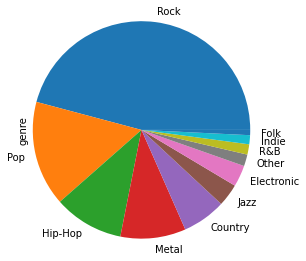

In [ ]:
# Showing a pie-chart of all the genres in the dataset
df['genre'].value_counts().plot.pie(radius=1.25)
from google.colab import files
plt.savefig("genre_pie_chart.pdf")
files.download("genre_pie_chart.pdf") 

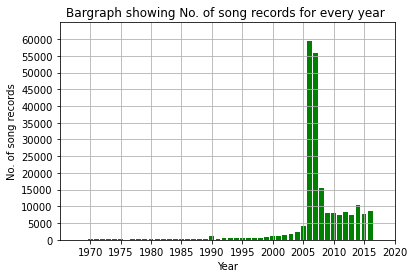

In [ ]:
# Bargraph showing No. of song records for every year 
freq = []
year = df['year'].unique()
year.sort()
for i in year :
  freq.append(len(df[df['year']==i])) 
plt.bar(year,freq,color="green")
plt.title("Bargraph showing No. of song records for every year ")
plt.xlabel("Year")
plt.ylabel("No. of song records")
plt.axis([1965,2020,0,65000])
plt.xticks(np.arange(1970, 2021, 5))
plt.yticks(np.arange(0, 65000, 5000))
plt.grid(True)
plt.show()

Lemmatization of Lyrics and Song titles

In [ ]:
# Song-titles -  converted to list of words
titles = []
for i in df.index :
  titles.append(df.loc[i,'song'].split("-"))
df['song_title_tokenised'] = titles
df.head(10)

,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, 'm, gon, na, cut, right, chas...","[oh, babi, know, 'm, gon, na, cut, right, chas...","[ego, remix]"
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, 's, like, seem, sur...","[playin, everyth, easi, 's, like, seem, sure, ...","[then, tell, me]"
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, n't, hard, find, love, ne...","[search, tender, n't, hard, find, love, need, ...",[honesty]
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[you, are, my, rock]"
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, 's, popping, si...","[parti, peopl, peopl, parti, 's, pop, sit, aro...","[black, culture]"
5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,i heard church bells ringing i heard a choir s...,"[heard, church, bells, ringing, heard, choir, ...","[heard, church, bell, ring, heard, choir, sing...","[all, i, could, do, was, cry]"
6,once-in-a-lifetime,2009,beyonce-knowles,Pop,this is just another day that i would spend wa...,"[another, day, would, spend, waitin, right, on...","[anoth, day, would, spend, waitin, right, one,...","[once, in, a, lifetime]"
7,waiting,2009,beyonce-knowles,Pop,waiting waiting waiting waiting waiting waitin...,"[waiting, waiting, waiting, waiting, waiting, ...","[wait, wait, wait, wait, wait, wait, wait, wai...",[waiting]
8,slow-love,2009,beyonce-knowles,Pop,i read all of the magazines while waiting aro...,"[read, magazines, waiting, around, said, could...","[read, magazin, wait, around, said, could, n't...","[slow, love]"
9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,n n now honey you better sit down and look aro...,"[n, n, honey, better, sit, look, around, 'caus...","[n, n, honey, better, sit, look, around, 'caus...","[why, don, t, you, love, me]"


In [ ]:
# Required libraries for lemmatization
!pip install pattern
import pattern
from pattern.en import lemma, lexeme

     |████████████████████████████████| 22.2 MB 34.6 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
     |████████████████████████████████| 81 kB 9.6 MB/s 
     |████████████████████████████████| 5.6 MB 50.2 MB/s 
     |████████████████████████████████| 5.6 MB 21.2 MB/s 
     |████████████████████████████████| 419 kB 49.3 MB/s 
     |████████████████████████████████| 97 kB 7.0 MB/s 
     |████████████████████████████████| 3.2 MB 13.7 MB/s 
  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332722 sha256=2d2618dea77741d891c367efbc212d12cac2012add5e8a68cda1e86662ebcca4
  Stored in directory: /root/.cache/pip/wheels/8d/1f/4e/9b67afd2430d55dee90bd57618dd7d899f1323e5852c465682
  Created wheel for mysqlclient: filename=mysqlclient-2.0.3-cp37-cp37m-linux_x86_64.whl size=100132 sha256=18e8480bdbca5b248b79adb8d8a1befc4d120d8c4ec3a48c301fd20461e8f25b
  Stored in directory: /root/.cache/pip/wheels/79/1c/f8/11fafab45fe6696eea63794a5d747b9c6b54990ac6f1885fb7
  

In [ ]:
# Lemmatizing song titles and adding it as a new column
Lemmatized_titles = []
for i in df.index :
  s = df.loc[i,'song_title_tokenised']
  if len(s) <= 1 :
    s = [lemma(wd) for wd in s ]
    s = s[0]
  else :
    s = " ".join([lemma(wd) for wd in s ])
  Lemmatized_titles.append(s)
df['lemmatized_song_titles'] = Lemmatized_titles
df.head(20)

,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, 'm, gon, na, cut, right, chas...","[oh, babi, know, 'm, gon, na, cut, right, chas...","[ego, remix]",ego remix
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, 's, like, seem, sur...","[playin, everyth, easi, 's, like, seem, sure, ...","[then, tell, me]",then tell me
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, n't, hard, find, love, ne...","[search, tender, n't, hard, find, love, need, ...",[honesty],honesty
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[you, are, my, rock]",you be my rock
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, 's, popping, si...","[parti, peopl, peopl, parti, 's, pop, sit, aro...","[black, culture]",black culture
5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,i heard church bells ringing i heard a choir s...,"[heard, church, bells, ringing, heard, choir, ...","[heard, church, bell, ring, heard, choir, sing...","[all, i, could, do, was, cry]",all i can do be cry
6,once-in-a-lifetime,2009,beyonce-knowles,Pop,this is just another day that i would spend wa...,"[another, day, would, spend, waitin, right, on...","[anoth, day, would, spend, waitin, right, one,...","[once, in, a, lifetime]",once in a lifetime
7,waiting,2009,beyonce-knowles,Pop,waiting waiting waiting waiting waiting waitin...,"[waiting, waiting, waiting, waiting, waiting, ...","[wait, wait, wait, wait, wait, wait, wait, wai...",[waiting],wait
8,slow-love,2009,beyonce-knowles,Pop,i read all of the magazines while waiting aro...,"[read, magazines, waiting, around, said, could...","[read, magazin, wait, around, said, could, n't...","[slow, love]",slow love
9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,n n now honey you better sit down and look aro...,"[n, n, honey, better, sit, look, around, 'caus...","[n, n, honey, better, sit, look, around, 'caus...","[why, don, t, you, love, me]",why don t you love me


In [ ]:
# Lemmatizing lyrics
Lemmatized_lyrics = []
for i in df.index :
  s = df.loc[i,'token_lyrics']
  s = " ".join([lemma(wd) for wd in s ])
  Lemmatized_lyrics.append(s)
df['lemmatized_lyrics'] = Lemmatized_lyrics
df.head(20)

,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, 'm, gon, na, cut, right, chas...","[oh, babi, know, 'm, gon, na, cut, right, chas...","[ego, remix]",ego remix,oh baby know be gon na cut right chase women m...
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, 's, like, seem, sur...","[playin, everyth, easi, 's, like, seem, sure, ...","[then, tell, me]",then tell me,playin everythe easy be like seem sure still w...
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, n't, hard, find, love, ne...","[search, tender, n't, hard, find, love, need, ...",[honesty],honesty,search tendernes be hard find love need live l...
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[you, are, my, rock]",you be my rock,oh oh oh oh oh oh write book stand title book ...
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, 's, popping, si...","[parti, peopl, peopl, parti, 's, pop, sit, aro...","[black, culture]",black culture,party people people party be pop sit around se...
5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,i heard church bells ringing i heard a choir s...,"[heard, church, bells, ringing, heard, choir, ...","[heard, church, bell, ring, heard, choir, sing...","[all, i, could, do, was, cry]",all i can do be cry,hear church bell ring hear choir sing see love...
6,once-in-a-lifetime,2009,beyonce-knowles,Pop,this is just another day that i would spend wa...,"[another, day, would, spend, waitin, right, on...","[anoth, day, would, spend, waitin, right, one,...","[once, in, a, lifetime]",once in a lifetime,another day would spend waitin right one stare...
7,waiting,2009,beyonce-knowles,Pop,waiting waiting waiting waiting waiting waitin...,"[waiting, waiting, waiting, waiting, waiting, ...","[wait, wait, wait, wait, wait, wait, wait, wai...",[waiting],wait,wait wait wait wait wait wait wait wait wait w...
8,slow-love,2009,beyonce-knowles,Pop,i read all of the magazines while waiting aro...,"[read, magazines, waiting, around, said, could...","[read, magazin, wait, around, said, could, n't...","[slow, love]",slow love,read magazine wait around say can be wait see ...
9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,n n now honey you better sit down and look aro...,"[n, n, honey, better, sit, look, around, 'caus...","[n, n, honey, better, sit, look, around, 'caus...","[why, don, t, you, love, me]",why don t you love me,n n honey better sit look around 'cause must h...


Further Dataset Analysis and Visualisation

In [ ]:
# Finding unique stemmed tokenised words in lyrics of each song and saving it as a new column
#del df['uniquewords']
def unique(list1):
   # for any list of strings, return a list of unique words
     unique_list = []
     for x in list1:
         if x not in unique_list:
              unique_list.append(x)
     return unique_list

masterList = []
for i in df.index:
    lemma_lyr = df.loc[i,'lemmatized_lyrics']
    lemma_lyr = lemma_lyr.split()
    masterList.append(unique(lemma_lyr))

df['uniquewords'] = masterList
df.head()

,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords
0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"[oh, baby, know, 'm, gon, na, cut, right, chas...","[oh, babi, know, 'm, gon, na, cut, right, chas...","[ego, remix]",ego remix,oh baby know be gon na cut right chase women m...,"[oh, baby, know, be, gon, na, cut, right, chas..."
1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, easy, 's, like, seem, sur...","[playin, everyth, easi, 's, like, seem, sure, ...","[then, tell, me]",then tell me,playin everythe easy be like seem sure still w...,"[playin, everythe, easy, be, like, seem, sure,..."
2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"[search, tenderness, n't, hard, find, love, ne...","[search, tender, n't, hard, find, love, need, ...",[honesty],honesty,search tendernes be hard find love need live l...,"[search, tendernes, be, hard, find, love, need..."
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...","[you, are, my, rock]",you be my rock,oh oh oh oh oh oh write book stand title book ...,"[oh, write, book, stand, title, would, ``, lif..."
4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"[party, people, people, party, 's, popping, si...","[parti, peopl, peopl, parti, 's, pop, sit, aro...","[black, culture]",black culture,party people people party be pop sit around se...,"[party, people, be, pop, sit, around, see, loo..."


In [ ]:
# Creating a subset of the dataset for further analysis and visulaization
df_sample = {}
df_subset = pd.DataFrame()
for i in genre_unique :
  df_sample[i] = df.loc[df['genre']==i].sample(frac=1).reset_index(drop=True)
  df_sample[i] = df_sample[i][:55]
  df_subset = pd.concat([df_sample[i],df_subset])
  df_subset = df_subset.sample(frac=1)
df_subset = df_subset.reset_index(drop=True)
print("No. of records in smaller sample = ",len(df_subset))
df_subset.head()

No. of records in smaller sample =  605


,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords
0,money-for-nothing,2005,darin,Pop,people tell me that i just daydream and waste ...,"[people, tell, daydream, waste, time, ohh, 's,...","[peopl, tell, daydream, wast, time, ohh, 's, r...","[money, for, nothing]",money for nothe,people tell day-dream waste time ohh be really...,"[people, tell, day-dream, waste, time, ohh, be..."
1,six-pack,2012,gifted-but-twisted,R&B,check out my six pack whoa they love my six pa...,"[check, six, pack, whoa, love, six, pack, whoa...","[check, six, pack, whoa, love, six, pack, whoa...","[six, pack]",six pack,check six pack whoa love six pack whoa let be ...,"[check, six, pack, whoa, love, let, be, grab, ..."
2,building-as-foreign,2015,admiral-fallow,Indie,how we had ended up here with start we had ama...,"[ended, start, amazes, humble, backyard, brawl...","[end, start, amaz, humbl, backyard, brawl, smi...","[building, as, foreign]",build a foreign,end start amaze humble backyard brawl smile ze...,"[end, start, amaze, humble, backyard, brawl, s..."
3,dream-a-dream,2006,captain-jack,Electronic,hooh one more time i'm back with a new rhyme h...,"[hooh, one, time, 'm, back, new, rhyme, hey, g...","[hooh, one, time, 'm, back, new, rhyme, hey, g...","[dream, a, dream]",dream a dream,hooh one time be back new rhyme hey go ha turn...,"[hooh, one, time, be, back, new, rhyme, hey, g..."
4,i-know-a-dream-when-i-see-one,2007,dean-martin,Jazz,i know a dream when i see one for i'm a dreame...,"[know, dream, see, one, 'm, dreamer, know, kno...","[know, dream, see, one, 'm, dreamer, know, kno...","[i, know, a, dream, when, i, see, one]",i know a dream when i see one,know dream see one be dreamer know know dream ...,"[know, dream, see, one, be, dreamer, hold, min..."


In [ ]:
df['uniquewords']

0         [oh, baby, know, be, gon, na, cut, right, chas...
1         [playin, everythe, easy, be, like, seem, sure,...
2         [search, tendernes, be, hard, find, love, need...
3         [oh, write, book, stand, title, would, ``, lif...
4         [party, people, be, pop, sit, around, see, loo...
                                ...                        
218204    [get, ta, say, boy, couple, date, be, hand, ou...
218205    [help, find, diamond, ring, make, try, everyth...
218206    [look, couple, corner, booth, lot, like, be, w...
218207    [fly, mortal, earth, be, measure, depth, girth...
218208    [hear, friend, finally, get, rid, girlfriend, ...
Name: uniquewords, Length: 218209, dtype: object

In [ ]:
#Create a new dataframe of all the  words used in lyrics and its genre and showing frequency of words in each genre
from sklearn.feature_extraction.text import CountVectorizer
#list used to store the information
set_uniquewords = []
set_genres = []

#Iterate through each word and genre and stores them into the new lists
for i in df_subset.index:
    for word in df_subset.loc[i,'uniquewords']:
        set_uniquewords.append(word)
        set_genres.append(df_subset.loc[i,'genre'])
        
#create the new data frame  with the information of words and genre lists
words_data = pd.DataFrame({'uniquewords':set_uniquewords,'genre':set_genres})

# count the frequency of each word that aren't on the stop_words lists
cv = CountVectorizer(stop_words=stop_words)

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their genre
text_cv = cv.fit_transform(words_data['uniquewords'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['genre'] = words_data['genre']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by genre
vect_words = data_cv.groupby('genre').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'uniquewords'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv('uniquewords.csv',index=False)

#change the order of columns to a specific order
vect_words = vect_words[['uniquewords','Rock','Pop','Hip-Hop','Metal','Country','Jazz','Electronic','Other','Indie','R&B','Folk']]

vect_words

,uniquewords,Rock,Pop,Hip-Hop,Metal,Country,Jazz,Electronic,Other,Indie,R&B,Folk
0,06,0,0,0,0,0,0,0,0,0,0,1
1,09,0,0,1,0,0,0,0,0,0,0,0
2,10,2,0,2,0,0,0,0,0,0,0,0
3,100,0,1,3,0,0,0,0,1,0,0,0
4,107,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6574,zip,0,0,1,0,0,0,0,0,0,1,0
6575,zombie,0,0,0,1,0,0,0,0,0,0,0
6576,zone,0,0,1,1,0,0,0,0,0,1,0
6577,zoo,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Creating wordclouds
!pip install wordcloud

<Figure size 432x288 with 0 Axes>

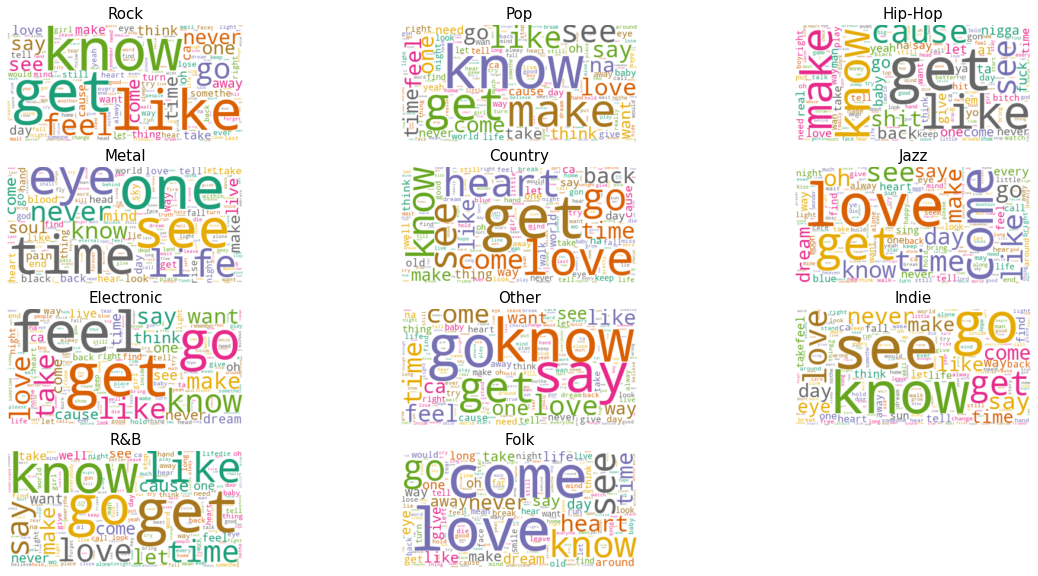

In [ ]:
from wordcloud import WordCloud 
def plot_wordcloud(df_subset,row,col):
    wc = WordCloud(background_color="white",colormap="Dark2",max_font_size=100,random_state=15)
    fig = plt.figure(figsize=(20,10))
     
    for index, value in enumerate(df_subset.columns[1:]):
        top_dict = dict(zip(df_subset['uniquewords'].tolist(),df_subset[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15)
        
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

#Plot the word cloud
plot_wordcloud(vect_words,4,3)

In [ ]:
# crashes with the entire data - try doing one task per loop


# Genre-wise word statistics of subset of dataset 
def words_stats(df_subset,main_data):
    unique_words = []
    total_words = []
    total_news = []
    genres = []
    
    for value in df_subset.columns[1:]:
        unique_words.append(np.count_nonzero(df_subset[value]))
        total_words.append(sum(df_subset[value]))
        genres.append(str(value))
        total_news.append(main_data['genre'][main_data['genre']==value].count())

    myData = pd.DataFrame({'genre':genres,'unique words':unique_words,'total words':total_words,'total songs':total_news})

    myData['words per songs'] = round(myData['total words'] / myData['total songs'],0)

    myData['words per songs'] = myData['words per songs'].astype('int')

    return myData

#display the table of statistics
words_stats(vect_words,df_subset)

,genre,unique words,total words,total songs,words per songs
0,Rock,1220,2794,55,51
1,Pop,1244,3162,55,57
2,Hip-Hop,3224,8225,55,150
3,Metal,1638,3169,55,58
4,Country,1168,2795,55,51
5,Jazz,1079,2258,55,41
6,Electronic,1033,2212,55,40
7,Other,1203,2825,55,51
8,Indie,1239,2837,55,52
9,R&B,1223,3041,55,55


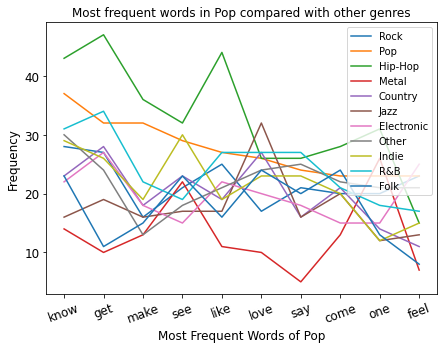

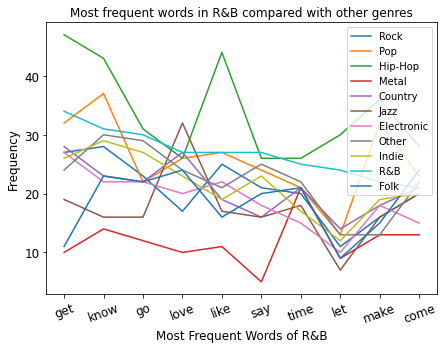

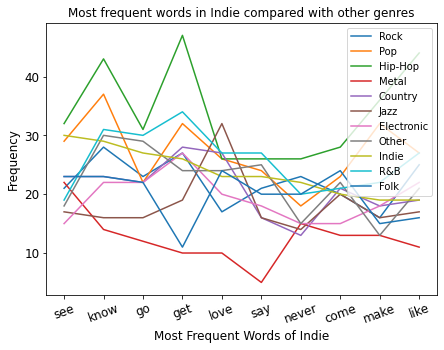

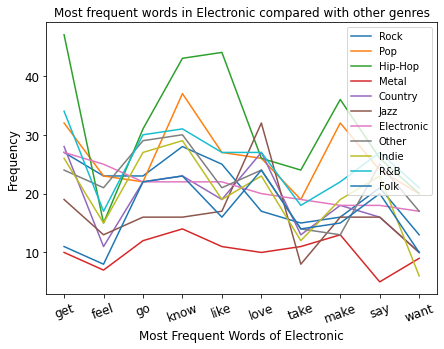

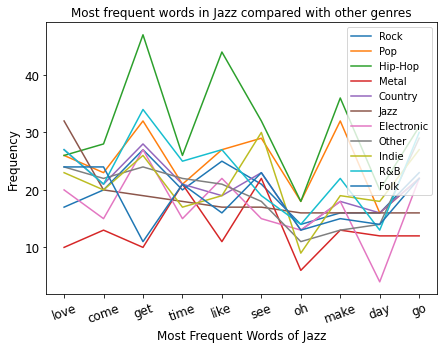

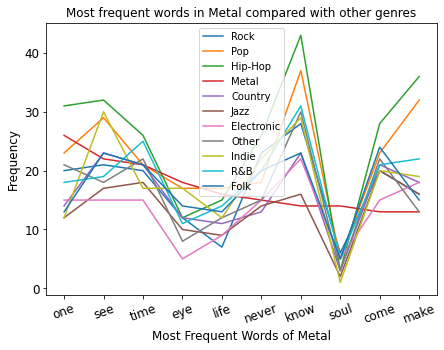

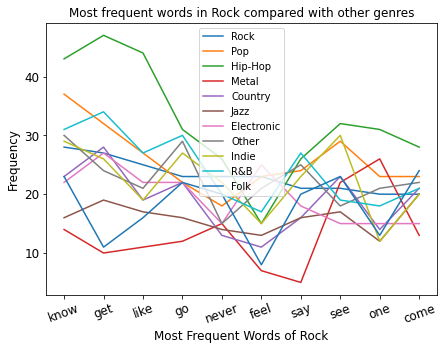

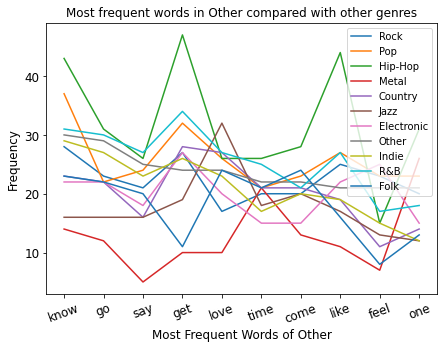

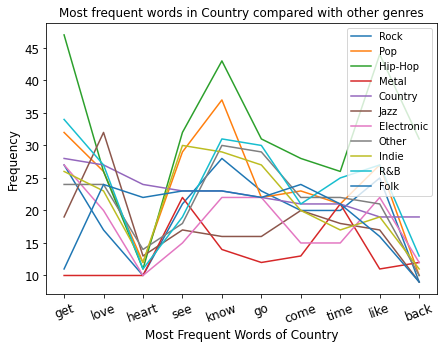

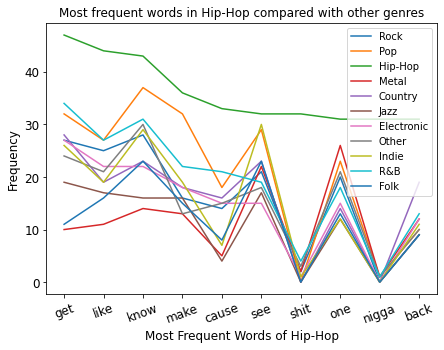

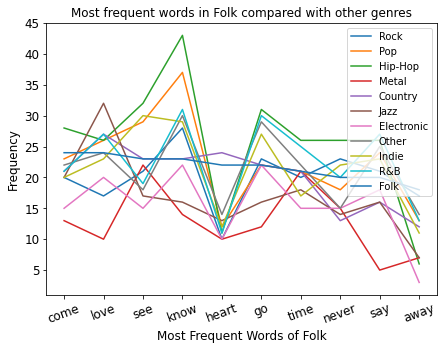

In [ ]:
#Most frequent words in one genre compared with other genres
def plot_freq_words(df_subset,genre,n_words):
    top_words_2020 = df_subset.sort_values([genre],ascending=False).head(n_words)
    #print(top_words_2020)
    fig = plt.figure(figsize=(7,5))
    for i in range(1,12):
        plt.plot(top_words_2020['uniquewords'],top_words_2020[df_subset.columns[i]])
    plt.legend(df_subset.columns[1:].tolist())
    plt.title(f"Most frequent words in {genre} compared with other genres",fontsize=12)
    plt.xlabel(f'Most Frequent Words of {genre}',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.show()

#Ploting the comparison plot 
for i in df_subset['genre'].unique() : 
  plot_freq_words(vect_words,i,10)

**Importing Required Libraries & Loading dataset**

In [ ]:
# Importing required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading csv into df
df=pd.read_csv("/content/drive/MyDrive/sample_df.csv")   
df.head()

,Unnamed: 0,song,year,artist,genre,lyrics,token_lyrics,stemmed_tokenized_lyrics,song_title_tokenised,lemmatized_song_titles,lemmatized_lyrics,uniquewords,sentence_count,char_count,unique words,no_of_contractions,expanded_lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i'm gonna cut r...,"['oh', 'baby', 'know', ""'m"", 'gon', 'na', 'cut...","['oh', 'babi', 'know', ""'m"", 'gon', 'na', 'cut...","['ego', 'remix']",ego remix,oh baby know be gon na cut right chase women m...,"['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut...",229,864,229,0,oh baby know be gon na cut right chase women m...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"['playin', 'everything', 'easy', ""'s"", 'like',...","['playin', 'everyth', 'easi', ""'s"", 'like', 's...","['then', 'tell', 'me']",then tell me,playin everythe easy be like seem sure still w...,"['playin', 'everythe', 'easy', 'be', 'like', '...",129,548,129,3,playin everythe easy be like seem sure still w...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', ""n't"", 'hard', 'find'...","['search', 'tender', ""n't"", 'hard', 'find', 'l...",['honesty'],honesty,search tendernes be hard find love need live l...,"['search', 'tendernes', 'be', 'hard', 'find', ...",82,400,82,0,search tendernes be hard find love need live l...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote a book about ...,"['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'wrote', ...","['you', 'are', 'my', 'rock']",you be my rock,oh oh oh oh oh oh write book stand title book ...,"['oh', 'write', 'book', 'stand', 'title', 'wou...",264,980,264,0,oh oh oh oh oh oh write book stand title book ...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it's pop...,"['party', 'people', 'people', 'party', ""'s"", '...","['parti', 'peopl', 'peopl', 'parti', ""'s"", 'po...","['black', 'culture']",black culture,party people people party be pop sit around se...,"['party', 'people', 'be', 'pop', 'sit', 'aroun...",189,757,189,0,party people people party be pop sit around se...
